# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 3: *TruncatedMedianFilter*
Noise reduction by truncated median filter
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageL

# Iteration
from timeit import itertools

### Parameters:
    imageName = Input image name
    kernelSize = Size of the kernel

In [2]:
imageName = "artery.png"
kernelSize = 7

### Read and show input image

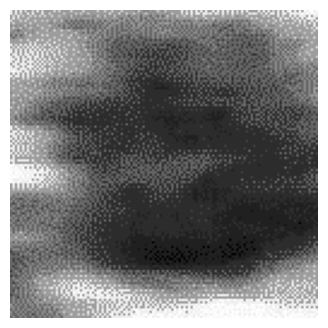

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter3/Input/")
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Apply filter

In [4]:
# Create images to store the result
outputImage = createImageL(width, height)

kernelCentre = int((kernelSize - 1) / 2)
for x,y in itertools.product(range(0, width), range(0, height)):
        
    # Iterate Window to collect values to compute mean and median 
    region = [ ]
    sumValues = 0.0
    for wx,wy in itertools.product(range(0, kernelSize), range(0, kernelSize)):
        posY, posX = y + wy - kernelCentre, x + wx - kernelCentre 
        
        if posY > -1 and posY <  height and  posX > -1 and posX <  width:
            sumValues += inputImage[posY,posX]
            region.append(inputImage[posY,posX]) 
    
    # Compute mean and median of the window
    numPixels = len(region)
    if numPixels > 0:
        
        # Mean and median
        mean = sumValues / numPixels 
        region.sort()
        median = region[int(numPixels/2)]
        
        # Upper and low
        upper, lower = 2.0*median-region[0], 2.0*median-region[numPixels-1]
                    
        # Create a list of truncated values 
        truncatedRegion = [ ]            
        for wx,wy in itertools.product(range(0, kernelSize), range(0, kernelSize)):
            posY, posX = y + wy - kernelCentre, x + wx - kernelCentre
            
            if posY > -1 and posY <  height and  posX > -1 and posX <  width:
                if (inputImage[posY,posX] < upper and median < mean) or               \
                   (inputImage[posY,posX] > lower and median > mean):
                    truncatedRegion.append(inputImage[posY,posX])   
                     
        # Compute median of truncated pixels                 
        numTruncatedPixels = len(truncatedRegion) 
        if  numTruncatedPixels > 0:  
            truncatedRegion.sort()
            outputImage[y,x] = truncatedRegion[int(numTruncatedPixels/2)]    
        else:
            outputImage[y,x] = median

### Show output image

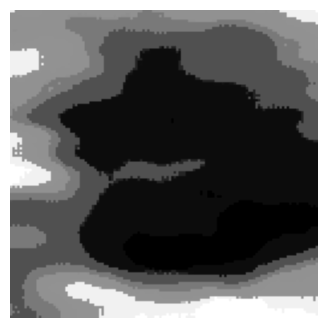

In [5]:
plotImageL(outputImage, figureSize = 4)